# Transactions Fraud Detection

**Authors:** [Peter Macinec](https://github.com/pmacinec), [Timotej Zatko](https://github.com/timzatko)

## Baseline model

At this jupyter notebook, baseline model will be trained on both, original data and balanced data. Also, *Recursive Feature Elimination with Cross-Validation (RFECV)* will be used for feature selection.

Because decision tree turned out to be the best choice in model selection phase, decision tree algorithm will be used for all baseline model combinations.

This setup will be then used to compare the results and performance of nature inspired algorithms used for feature selection.

### Setup and reading the data

At first, we need to import libraries and set initial configs.

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

from src.dataset import load_processed_data
from src.data_balancing import random_undersample
from src.evaluation import custom_classification_report

In [3]:
x_train, y_train, x_test, y_test = load_processed_data()

Number of records:
  x_train - 472432
  y_train - 472432
  x_test - 118108
  y_test - 118108


Data will be balanced using random undersampling method:

In [4]:
%%time
x_train_undersampled, y_train_undersampled = random_undersample(x_train, y_train)
len(x_train_undersampled), len(y_train_undersampled)

CPU times: user 1.18 s, sys: 144 ms, total: 1.32 s
Wall time: 1.32 s


(32842, 32842)

### Baseline model - original data

As first baseline model, decision tree will be trained on original data without balancing (only `class_weight` parameter is set to `balanced`):

#### All features

In [5]:
%%time

clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf = clf.fit(x_train, y_train)

CPU times: user 1min 35s, sys: 236 ms, total: 1min 35s
Wall time: 1min 36s


not fraud
precision: 0.9851667749811182
recall: 0.9840346675789714
f1-score: 0.9846003958518935
support: 113997


is fraud
precision: 0.570957095709571
recall: 0.5891510581367064
f1-score: 0.579911409074584
support: 4111


accuracy: 0.9702899041555186


macro avg
precision: 0.7780619353453446
recall: 0.7865928628578389
f1-score: 0.7822559024632387
support: 118108


weighted avg
precision: 0.9707493266161866
recall: 0.9702899041555186
f1-score: 0.9705143354271847
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7780619353453445




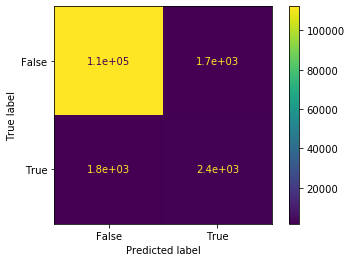

In [6]:
custom_classification_report(clf, x_test, y_test)

#### Feature selection (RFECV)

In [ ]:
rfecv = RFECV(estimator=clf, scoring='roc_auc')
rfecv.fit(x_train, y_train)

print(f'Optimal number of features: {rfecv.n_features_}')

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('CV score (roc auc)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
custom_classification_report(rfecv.estimator_, x_test, y_test)

### Baseline model - balanced data

Next baseline models, decision tree will be trained on balanced data (using random undersampling):

#### All features

In [7]:
%%time
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train_undersampled, y_train_undersampled)

CPU times: user 3.23 s, sys: 0 ns, total: 3.23 s
Wall time: 3.23 s


not fraud
precision: 0.7738921188063161
recall: 0.990713466597711
f1-score: 0.8689821115121393
support: 88946


is fraud
precision: 0.8052805280528053
recall: 0.1171387421987518
f1-score: 0.20452640402347025
support: 29162


accuracy: 0.7750194737020354


macro avg
precision: 0.7895863234295607
recall: 0.5539261043982314
f1-score: 0.5367542577678048
support: 118108


weighted avg
precision: 0.7816422186339833
recall: 0.7750194737020354
f1-score: 0.7049216131395942
support: 118108


Area Under the Receiver Operating Characteristic Curve (ROC AUC)
Score: 0.7895863234295607




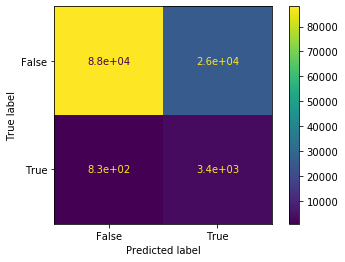

In [8]:
custom_classification_report(clf, x_test, y_test)

#### Feature selection (RFECV)

In [ ]:
rfecv = RFECV(estimator=clf, scoring='roc_auc')
rfecv.fit(x_train_undersampled, y_train_undersampled)

print(f'Optimal number of features: {rfecv.n_features_}')

plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('CV score (roc auc)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
custom_classification_report(rfecv.estimator_, x_test, y_test)

### Conclusion

In this jupyter notebook, baseline models have been trained. Those baselines will be used for comparison with models trained only on features received from feature selection using nature inspired algorithms.